# TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\machine_learning\titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numerical value analysis

In [6]:
df[['Survived','Age','SibSp','Parch','Fare']].corr()

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.096067,0.159651,0.216225,1.000000


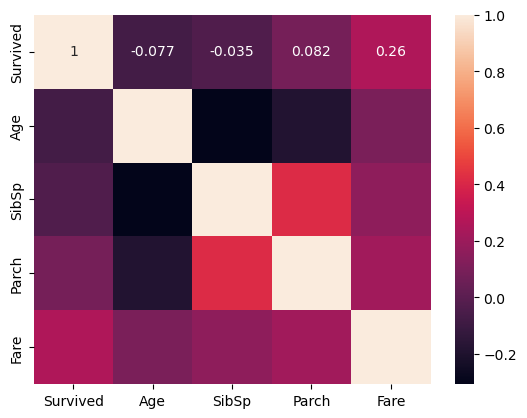

In [7]:
heatmap=sns.heatmap(df[['Survived','Age','SibSp','Parch','Fare']].corr(),annot=True)

In [8]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [9]:
df['SibSp'].nunique()

7

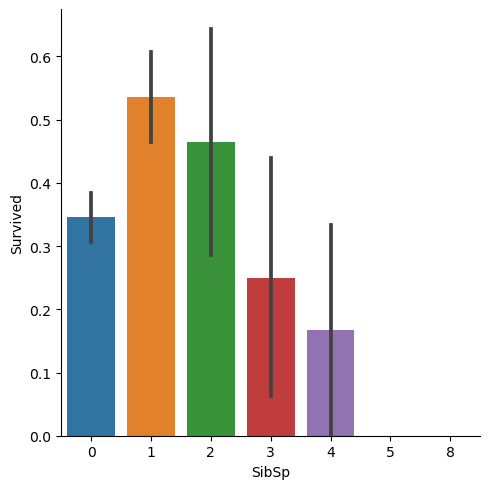

In [10]:
sns.catplot(data=df,x='SibSp',y='Survived',kind='bar')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

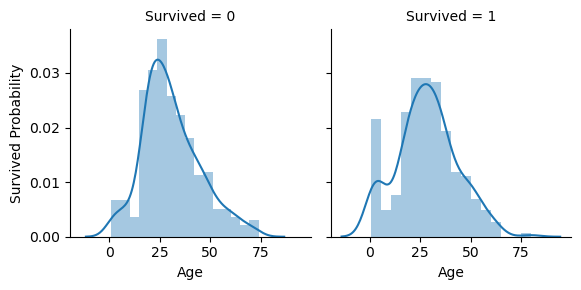

In [11]:
age_visual=sns.FacetGrid(df,col='Survived')
age_visual=age_visual.map(sns.distplot , 'Age').set_ylabels('Survived Probability')

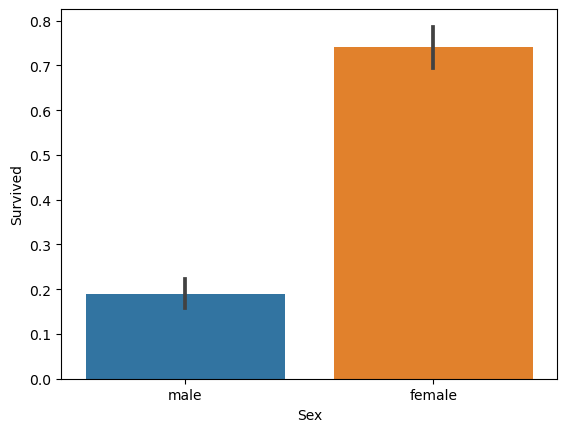

In [12]:
age_plot=sns.barplot(data=df,x='Sex',y='Survived')

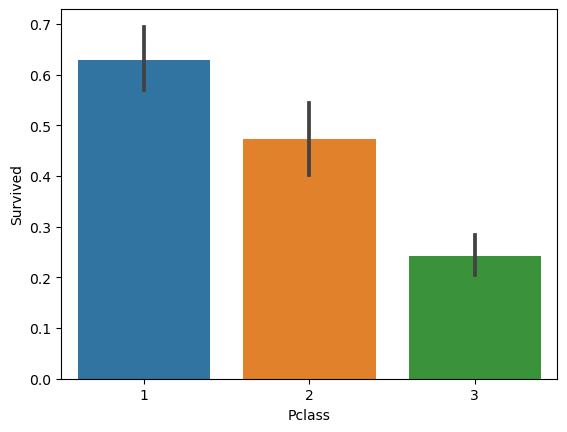

In [13]:
pclass=sns.barplot(data=df,x='Pclass',y='Survived')

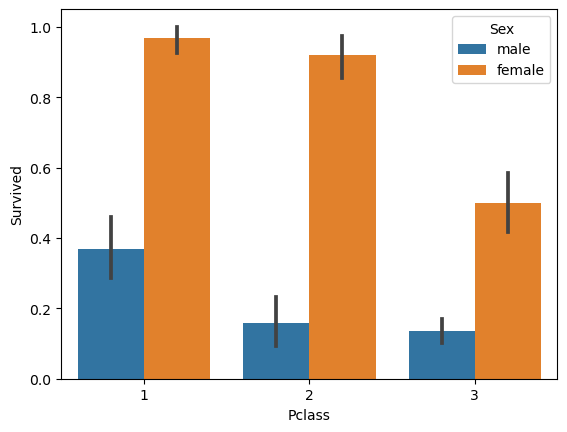

In [14]:
pclass=sns.barplot(data=df,x='Pclass',y='Survived',hue='Sex')

### Embarked

In [15]:
df['Embarked'].isna().sum()

2

In [16]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
df['Embarked']=df['Embarked'].fillna('S')

<Axes: xlabel='Embarked', ylabel='Survived'>

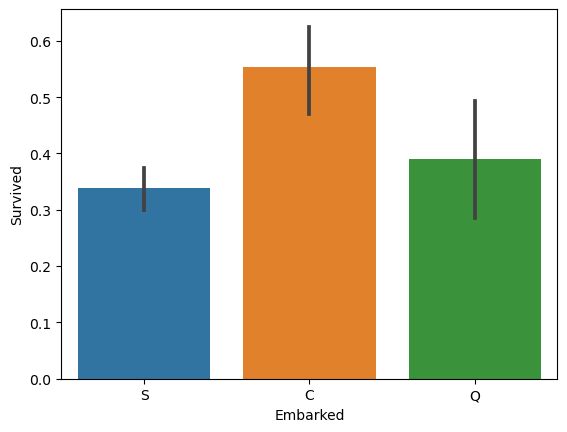

In [18]:
sns.barplot(data=df,x='Embarked',y='Survived')

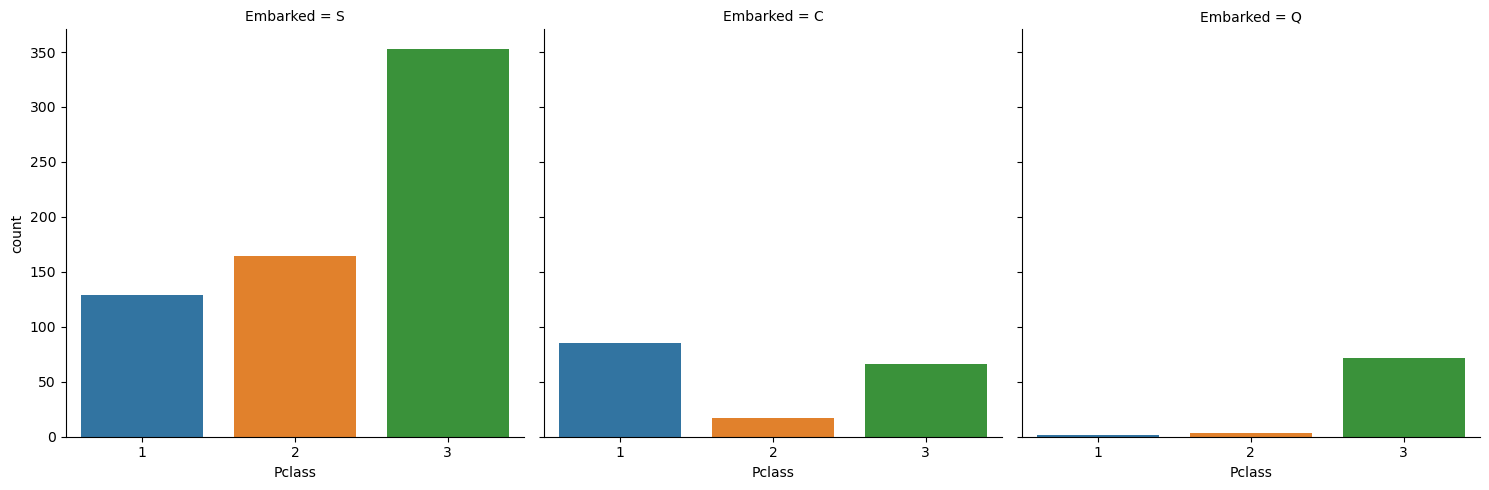

In [19]:
#Embarked vs Class
sns.catplot(data=df,x='Pclass',col='Embarked',kind='count')

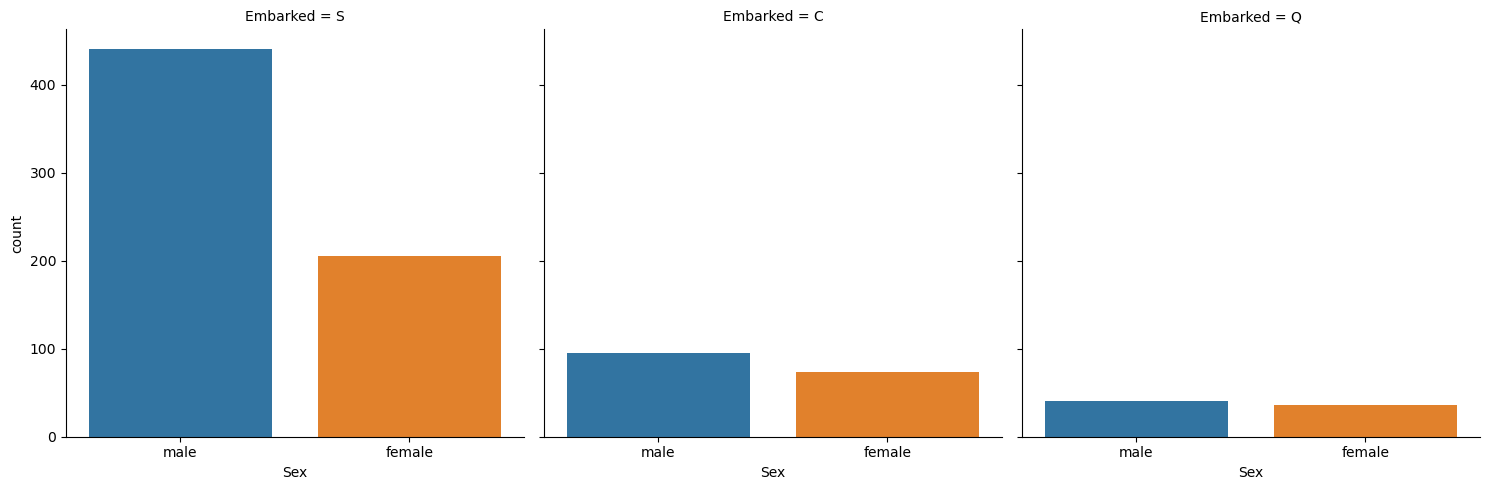

In [20]:
sns.catplot(data=df,x='Sex',col='Embarked',kind='count')

#### Filling null values with a random value from values in a particular range of mean-stdev to mean+stdev

In [21]:
mean=df['Age'].mean()
stdev=df['Age'].std()
is_null=df['Age'].isnull().sum()
print(mean,stdev,is_null)

29.69911764705882 14.526497332334044 177


In [22]:
random_age=np.random.randint(mean-stdev, mean+stdev, size=is_null)
random_age

array([20, 29, 38, 27, 28, 33, 31, 28, 18, 38, 29, 37, 17, 26, 32, 31, 23,
       33, 21, 42, 36, 21, 42, 18, 23, 23, 31, 19, 15, 35, 27, 42, 30, 21,
       40, 31, 42, 36, 22, 34, 33, 31, 30, 18, 25, 18, 31, 36, 39, 37, 41,
       36, 15, 35, 34, 33, 39, 32, 30, 30, 40, 35, 27, 22, 41, 35, 24, 28,
       18, 28, 36, 17, 38, 25, 26, 22, 28, 40, 27, 27, 23, 16, 29, 25, 36,
       35, 18, 37, 16, 20, 16, 16, 30, 28, 38, 21, 23, 21, 21, 22, 31, 21,
       35, 27, 38, 32, 23, 15, 34, 43, 15, 23, 15, 28, 19, 20, 21, 43, 41,
       24, 23, 35, 42, 25, 29, 32, 20, 19, 43, 15, 26, 33, 42, 34, 18, 33,
       25, 19, 17, 34, 43, 26, 24, 33, 20, 17, 24, 30, 41, 39, 25, 16, 19,
       25, 22, 25, 40, 18, 32, 42, 37, 29, 30, 19, 15, 19, 34, 18, 15, 25,
       22, 38, 23, 40, 27, 22, 43])

In [23]:
type(random_age)

numpy.ndarray

In [25]:
a=df['Age'].copy()
a[np.isnan(a)]=random_age

In [26]:
a.isna().sum()

0

In [27]:
df['Age']=a
df['Age'].isna().sum()

0

In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
col_to_drop=['Name','PassengerId','Cabin','Ticket']
df.drop(col_to_drop,axis=1,inplace=True)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
#Converting categorical parameters to numerical ones
genders={'male':0,'female':1}
df['Sex']=df['Sex'].map(genders)
ports={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(ports)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [33]:
x=df.drop(df.columns[[0]],axis=1)
y=df['Survived']

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [35]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [36]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
rf_classifier=RandomForestClassifier(n_estimators=1000)

In [37]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [38]:
logreg_ypred=logreg.predict(xtest)
svc_classifier_ypred=svc_classifier.predict(xtest)
dt_classifier_ypred=dt_classifier.predict(xtest)
knn_classifier_ypred=knn_classifier.predict(xtest)
rf_classifier_ypred=rf_classifier.predict(xtest)

In [39]:
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest,logreg_ypred))
print(accuracy_score(ytest,svc_classifier_ypred))
print(accuracy_score(ytest,dt_classifier_ypred))
print(accuracy_score(ytest,knn_classifier_ypred))
print(accuracy_score(ytest,rf_classifier_ypred))

0.7985074626865671
0.8208955223880597
0.7611940298507462
0.8097014925373134
0.8246268656716418
